# Pairs Trading
Pairs trading is a market-neutral trading strategy that matches a long position with a short position in a pair of highly correlated instruments such as two stocks, exchange-traded funds (ETFs), currencies, commodities or options. Pairs traders wait for weakness in the correlation and then go long the under-performer while simultaneously short selling the over-performer, closing the positions as the relationship returns to statistical norms.

Thus, here we try to club togather assetes that are uncorrelated so that we can save ourselves from heavy loss. The basic strategy is to create a stable porfolio and keep earning on it. The following code are supported on Quantopian lecture series Jupyter Notebook platform, so that you do not have to hassel to gather and organise stock data for analysis purpose.
https://www.quantopian.com/lectures

## Covariance and Correlation between assets :
Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.

A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one security moves, either up or down, the other security moves in lockstep, in the same direction. A perfect negative correlation means that two assets move in opposite directions, while a zero correlation implies no relationship at all

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Individual Volatility : 
MSFT  =  2.62044652209
AAPL  =  7.42948441121
FB  =  2.67983067829
weights =  [ 0.32352941  0.29411765  0.38235294]
portfolio volatility =  3.00356111317


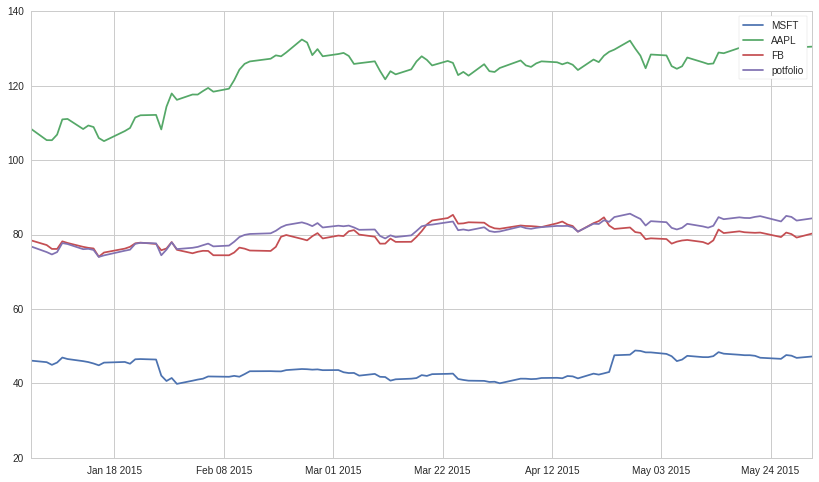

In [3]:
start = '2015-01-01'
end = '2015-06-01'
freq= 'daily'
companies = ['MSFT', 'AAPL','FB']
data = get_pricing(companies, start_date=start, end_date=end, frequency=freq, fields='price')
assets = np.array(data)
plt.plot(data)

asset_vol = [np.std(data[i]) for i in data.columns]
print 'Individual Volatility : '
for i in range(len(companies)):
    print companies[i],' = ',asset_vol[i]

weights = np.array([float(np.random.randint(10,20)) for i in companies])
weights /= np.sum(weights)
print 'weights = ', weights

portfolio = np.dot(assets, weights.T)
plt.plot(data.index, list(portfolio))
plt.legend(companies + ['potfolio'])

print 'portfolio volatility = ', np.std(portfolio)

It can be observed that created correctly (here on random weights basis), we can reduce volatility of a portfolio as compared to individual risky assets, in turn reducing the risk.

In [4]:
# Four asset example of the covariance matrix.
start_date = '2016-01-01'
end_date = '2016-02-01'

returns = get_pricing(
    ['SBUX', 'AAPL', 'GS', 'GILD'],
    start_date=start_date,
    end_date=end_date,
    fields='price'
).pct_change()[1:]

returns.columns = map(lambda x: x.symbol, returns.columns)

print 'Covariance matrix:'
print returns.cov()

Covariance matrix:
          SBUX      AAPL        GS      GILD
SBUX  0.000453  0.000330  0.000331  0.000075
AAPL  0.000330  0.000739  0.000463  0.000237
GS    0.000331  0.000463  0.000533  0.000130
GILD  0.000075  0.000237  0.000130  0.000569


Similarly, we can calculated the correlation between the assets.

In [6]:
# Four asset example of the correlation matrix.
start_date = '2016-01-01'
end_date = '2016-02-01'

returns = get_pricing(
    ['SBUX', 'AAPL', 'GS', 'GILD'],
    start_date=start_date,
    end_date=end_date,
    fields='price'
).pct_change()[1:]

returns.columns = map(lambda x: x.symbol, returns.columns)

print 'Correlation matrix:'
print returns.corr()


Correlation matrix:
          SBUX      AAPL        GS      GILD
SBUX  1.000000  0.570971  0.672166  0.147142
AAPL  0.570971  1.000000  0.737149  0.366184
GS    0.672166  0.737149  1.000000  0.235411
GILD  0.147142  0.366184  0.235411  1.000000


## How to pair Assets?

For creation of a stable portfolio one must select the assets thoughtfully, and assign the weights so too. After studying the Correlation and Covariance of various assets, and the historical data, I have concluded that pairing the assets from unrelated sector is the best practice. But you can always go with the correlation and covariance statistics of the assets.

Here, I have collected some of the Giants from few sectors of S&P 500 market so that the results can be generalized.

### Technology: (XLK)
    APPLE = AAPL
    NVDIA = NVDA
    FACEBOOK = FB
    AT&T = T
    QUALCOMM = QCOM
    CISCO = CSCO
    ADOBE = ADBE
    GOOGL
    MICROSOFT = MSFT
    INTEL = INTC
    
### Consumer Discreationary:(XLY)
    NETFLIX = NFLX
    NIKE = NKE
    MAC DONALDS = MCD
    21st CENTURY FOX = FOX
    STARBUCKS = SBUX
    HOME DEPOT = HD
    AMAZON = AMZN
    WALT DISNEY = DIS
    
### ENERGY : (XLE)
    CHEVRON CORP = CVX
    EXXON MOBILE CORP = EXN
    SCHLUMBERGER LIMITED = SLB
    CONOCO PHILLIPS = COP
    
### Financial : (XLF)    
    BERKSHIRE HATHAWAY = BRK.B
    BANK OF AMERICA CORP = BAC
    JP MORGAN CHASE = JPM
    WELLS FARGO = WFC

The follwing code first creates the Covariance and Correlation matrices of given list of assets, and then stores all the couples that can be paired togather. In the scatter plot, ones with the blue can be paired, while the red ones should be avoided togather in a portfolio construction. 
For pair selection criteria, the pair with covariance less than mean-covariance of either of the assets with all the others is preferred. Moreover, The correlation between then must be less (here, <0.5 ; lesser the better).

Covariance Matrix (x1000) :-
      AAPL  NVDA  QCOM  MSFT    FB  AMZN     T  ADBE  CSCO  INTL  ...    DIS  \
AAPL  0.22  0.12  0.11  0.10  0.09  0.10  0.03  0.10  0.08  0.09  ...   0.06   
NVDA  0.12  0.88  0.19  0.15  0.09  0.13  0.03  0.17  0.13  0.13  ...   0.11   
QCOM  0.11  0.19  0.31  0.11  0.03  0.07  0.04  0.12  0.12  0.10  ...   0.09   
MSFT  0.10  0.15  0.11  0.21  0.13  0.13  0.03  0.14  0.10  0.09  ...   0.06   
FB    0.09  0.09  0.03  0.13  0.32  0.19  0.02  0.12  0.06  0.05  ...   0.04   
AMZN  0.10  0.13  0.07  0.13  0.19  0.34  0.03  0.12  0.08  0.06  ...   0.05   
T     0.03  0.03  0.04  0.03  0.02  0.03  0.08  0.03  0.03  0.02  ...   0.03   
ADBE  0.10  0.17  0.12  0.14  0.12  0.12  0.03  0.24  0.10  0.10  ...   0.07   
CSCO  0.08  0.13  0.12  0.10  0.06  0.08  0.03  0.10  0.19  0.09  ...   0.08   
INTL  0.09  0.13  0.10  0.09  0.05  0.06  0.02  0.10  0.09  0.38  ...   0.09   
NFLX  0.13  0.15  0.11  0.13  0.16  0.19  0.01  0.14  0.08  0.09  ...   0.06   
DIS   0.06 

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


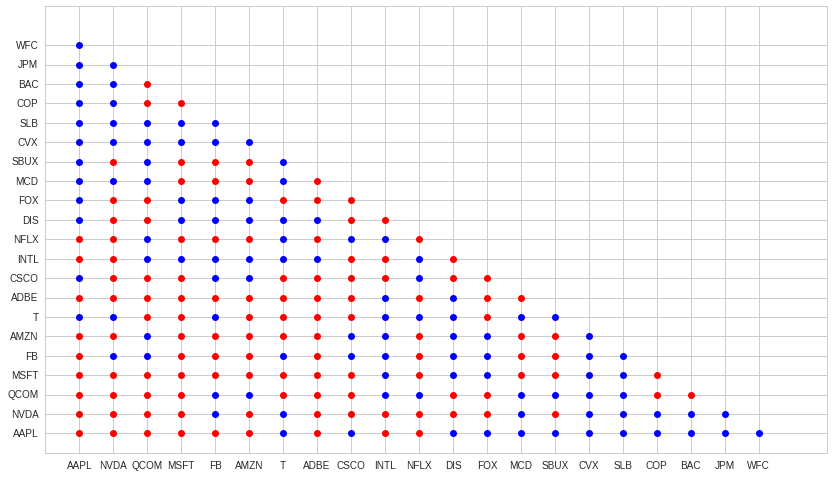

In [4]:

start_date = '2016-01-01'
end_date = '2017-01-01'
#names = ['AAPL', 'NVDA', 'QCOM', 'MSFT', 'FB', 'T', 'ADBE', 'CSCO', 'INTL', 'NFLX', 'DIS', 'FOX',  'MCD', 'SBUX', 'CVX', 'SLB', 'COP', 'BRK.B', 'BAC', 'JPM', 'WFC']
names = ['AAPL', 'NVDA', 'QCOM', 'MSFT', 'FB', 'AMZN', 'T', 'ADBE', 'CSCO', 'INTL', 'NFLX', 'DIS', 'FOX',  'MCD', 'SBUX', 'CVX', 'SLB', 'COP', 'BAC', 'JPM', 'WFC']
freq = 'daily'
returns = get_pricing( names,
    start_date=start_date,
    end_date=end_date,
    fields='price', frequency = freq
).pct_change()[1:]

returns.columns = map(lambda x: x.symbol, returns.columns)

Cov_mat = returns.cov()
mean_cov_each = Cov_mat.mean()
mean_cov_all = mean_cov_each.mean()
Corr_mat = returns.corr()
print 'Covariance Matrix (x1000) :-'
print np.round(Cov_mat*1000,2)
print '\nMean Covariance (x1000) :-'
print np.round(mean_cov_each*1000, 2)
print 'Mean covariance of portfolio := ', mean_cov_all
print '\nCorrelation Matrix :-'
print np.round(Corr_mat, 2)

Cov_mat = np.array(Cov_mat)
Corr_mat = np.array(Corr_mat)
Pairable = np.zeros(Cov_mat.shape)


x = range(len(names))

for i in x:
    for j in range(len(names)-i):
        if(Cov_mat[i,j] > mean_cov_each[i] or Cov_mat[i,j] > mean_cov_each[j] or Corr_mat[i][j]>0.5):
            plt.plot(i, j, 'o', color='red')    #Related : Do not Pair
        else:
            plt.plot(i, j, 'o', color='blue')    #Unrelated : Can be Paired
            Pairable[i,j] = 1

plt.xlim(-1,len(names)+1)
plt.ylim(-1,len(names)+1)
plt.xticks(x, names)    
plt.yticks(x, names)
plt.legend()    

## Sharpe Ratio
The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Subtracting the risk-free rate from the mean return, the performance associated with risk-taking activities can be isolated

Sharpe Ratio = ( Mean portfolio returns  -  Risk free returns) / Std. deviation of portfolio

for further info check : https://en.wikipedia.org/wiki/Sharpe_ratio

Usually, any Sharpe ratio greater than 1 is considered acceptable to good by investors. A ratio higher than 2 is rated as very good, and a ratio of 3 or higher is considered excellent. The basic purpose of the Sharpe ratio is to allow an investor to analyze how much greater a return he or she is obtaining in relation to the level of additional risk taken to generate that return.


In [6]:
iteration = 0
risk_free_rate = 0.05    #percent returns from Govt. bonds
x = range(len(names))

def select_new(selected):
    for i in x:
        if(i not in selected):
            count = len(selected)
            for j in selected:
                if(Pairable[i,j]!=1 or Pairable[j,i]!=1):
                    count -= 1
            if(float(count)/len(selected) > 0.5):
                selected.add(i)
                
    return selected



def sharpe_ratio(selected, weights, mean_returns, sub_cov_mat):    
    
    #p_r : protfolio return
    #p_std : portfolio std. deviation
    p_r = weights.dot(mean_returns.T)        
    p_std = weights.dot(sub_cov_mat.dot(weights.T))
    p_std *= len(returns)     #To annualise multiply by 252
    p_std = p_std ** 0.5
    sharpe_r = (p_r - risk_free_rate)/p_std
    
    #print 'portfolio returns = ', p_r
    #print 'Sub Cov Mat(x1000) = \n', np.round(sub_cov_mat * 1000, 2)
    #print 'Portfolio Std = ', p_std
    #print 'Sharpe ratio = ', sharpe_r
    return sharpe_r


portfolio_collection = []

while(iteration < 1000):
    iteration += 1
    selected = set()
    old = set()
    selected.add(np.random.randint(0,len(names)))
    selected.add(np.random.randint(0,len(names)))
    
    while(len(old) != len(selected)):
        old = selected
        selected = select_new(selected)

    if selected in portfolio_collection:
        continue
    portfolio_collection.append(selected)
    
    sharpe_r = 0
    eff_weights = np.ones(len(selected))
    #print '## Portfolio :- ', [names[s] for s in selected]            
    
    symbols = [names[s] for s in selected]        
    mean_returns = np.array(returns[symbols].mean())  
    mean_returns *= len(returns)  #To annualise multiply by 252
    #print 'Mean returns :- ', mean_returns    
    sub_cov_mat = np.array(returns[symbols].cov())        
    
    for _ in range(200):
        weights = [np.random.randint(50,500) for _ in selected]
        weights = np.array(weights, dtype=float)
        weights /= weights.sum()
        s_r = sharpe_ratio(selected, weights, mean_returns, sub_cov_mat)
        #print '\nAssigned weights = ', np.round(weights,2)
        if( s_r > sharpe_r):
            sharpe_r = s_r
            eff_weights = weights
    
    if sharpe_r > 2.8:
        print '\n# Portfolio := ', [names[s] for s in selected]
        print '# Optimum Weights := ', eff_weights
        print '# Highest sharp ratio := ',  sharpe_r
    



# Portfolio :=  ['COP', 'FB', 'T', 'NVDA']
# Optimum Weights :=  [ 0.07011494  0.05977011  0.52988506  0.34022989]
# Highest sharp ratio :=  2.86642016515

# Portfolio :=  ['NVDA', 'AMZN', 'CVX']
# Optimum Weights :=  [ 0.45559039  0.05433647  0.49007315]
# Highest sharp ratio :=  2.81947930264

# Portfolio :=  ['NVDA', 'FB', 'T', 'CVX']
# Optimum Weights :=  [ 0.33165829  0.07035176  0.51507538  0.08291457]
# Highest sharp ratio :=  2.95887064211

# Portfolio :=  ['AAPL', 'NVDA', 'BAC', 'MCD', 'T']
# Optimum Weights :=  [ 0.08425926  0.32685185  0.10277778  0.12314815  0.36296296]
# Highest sharp ratio :=  2.81069446796

# Portfolio :=  ['NVDA', 'FOX', 'T', 'FB']
# Optimum Weights :=  [ 0.41087344  0.06060606  0.42869875  0.09982175]
# Highest sharp ratio :=  2.81381433641

# Portfolio :=  ['AAPL', 'NVDA', 'JPM', 'MCD', 'T']
# Optimum Weights :=  [ 0.09138187  0.36627043  0.1589896   0.09732541  0.28603269]
# Highest sharp ratio :=  2.83334158862

# Portfolio :=  ['NVDA', 'FB', 'T', 